## Thalamic Segmentation By Unsupervised Clustering

Rebecca Waugh
May 9, 2019

# The thalamus in neuroimaging


from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./thal.mp4" type="video/mp4">
</video></div>""")



## Coronal view of first eigenvector of diffusion tensor image:
![coronal](coronal1.png)


## Processing workflow
![process](process.png)

In [ ]:
# Read Data
data=[]
tmp=pd.read_csv(initFile, header=None, delimiter=' ', index_col=False)
# image file formatted as slice by slice matrix so flatten and reshape into vectors
tmp2=np.array(tmp.iloc[:,0:256]).flatten().reshape(-1,1)
# Standardize
tmp3=normalize(tmp2,axis=0)
data=pd.DataFrame(tmp3)
data.columns = ['meanED'] 
for prop in props:
    print('----> Normalizing %s'%(prop))
    dat=[]
    propFile='%s.%s.%s.txt'%(subject,hemi,prop)
    tmp=pd.read_csv(propFile, header=None, delimiter=' ', index_col=False)
    tmp2=np.array(tmp.iloc[:,0:256]).flatten().reshape(-1,1)
    tmp3=normalize(tmp2,axis=0)
    data[prop]=tmp3

In [ ]:
#test for optimal cluster numbers with KMeans
Sum_of_squared_distances = []
K= range(2,30)
for k in K:
	print('----> Now running for model with %s clusters'%(k))
	model=KMeans(n_clusters=int(k), n_jobs=int(jobs), random_state=999)
	model.fit(data)
	pkl_filename='%s.%s.%s_clust.pkl'%(subject,hemi,k)
	with open(pkl_filename, 'wb') as file:
		pickle.dump(model, file)
	print('----> Model fitted for %s clusters'%(k))

# Splitting the loop and reloading the pkl file is slightly slower but allows for more robust handling of interruptions and debugging
for k in K:
	print('----> Now making predictions for fitted model with %s clusters'%(k))
	pkl_filename='%s.%s.%s_clust.pkl'%(subject,hemi,k)
	model=pickle.load( open ( pkl_filename, "rb" ) )
	y_predict=model.predict(data)
	predict_filename='%s.%s.%s.predict.csv'%(subject,hemi,k)
	clustpredict=np.array(y_predict)
	resizePredict=pd.DataFrame(clustpredict.reshape((40960, 256)))
# Save the predictions
	resizePredict.to_csv(predict_filename, sep=' ', index=False, header=False)
	print('----> Predictions complete for model with %s clusters'%(k))
	print('----> Estimating scores for fitted model with %s clusters'%(k))
# Get inertia for k
	Sum_of_squared_distances.append(model.inertia_)

# Save inertia vector
Sum_of_squared_distances=pd.DataFrame(Sum_of_squared_distances)
ssDistFile='%s.%s.ssdist.csv'%(subject,hemi)
Sum_of_squared_distances.to_csv(ssDistFile, sep=' ', index=False, header=False)


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.ioff()
path='./ssdist_data'
lh_files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and \
         'lh.ssdist.csv' in i]

lh_inertiaData=pd.read_csv('%s/11.lh.ssdist.csv'%(path), delimiter=' ', index_col=False)
lh_inertiaData.columns = ['11.lh.ssdist.csv'] 
for filename in os.listdir(path):
    if filename.endswith("lh.ssdist.csv"):
        name='%s/%s'%(path,filename)
        lh_inertiaData[filename]=pd.read_csv(name, delimiter=' ', index_col=False)

assert lh_inertiaData.shape==(27,19), print('error: missing inertia files')

x=list(range(2,29))
matplotlib.rcParams['figure.figsize'] = (10,10)
fig=plt.plot(x,lh_inertiaData)
plt.title('Inertia Values for Left Hemisphere Thalamus (n=19)',fontsize=20)
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Inertia Value', fontsize=16)


Text(0, 0.5, 'Inertia Value')

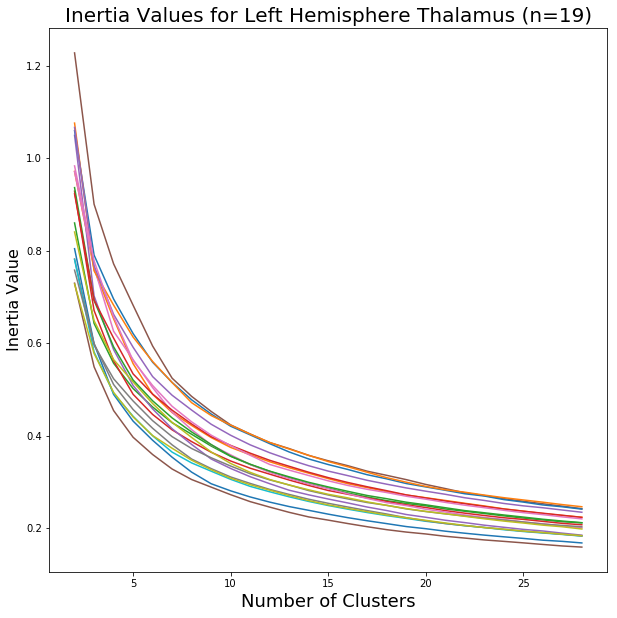

In [4]:
plt.show(fig)

## Single subject left thalamus with 8 clusters

![clust](cluster.singlesub.png)

## Next Steps

- Try warping to group space before clustering
- Test with greater number of clusters
- Experiment with alternative features...or no features


<img src="thal15.sag.png" width="200" height="200" align="center"/>


## Thank you! 